In [1]:
# To import various libraries

import cv2
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from matplotlib import pyplot as plt
import math
from sympy import Matrix 
import random
from scipy.linalg import null_space
import cv2 as cv

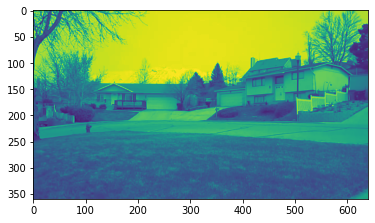

In [2]:
# To access and plot "img1"

image1=Image.open('img1.png')
image1_matrix=np.array(image1)
A1,B1=image1_matrix.shape
A1,B1
pyplot.imshow(image1)
pyplot.show()

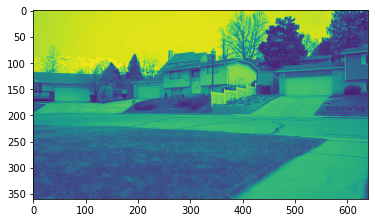

In [3]:
# To access and plot "img2"

image2=Image.open('img2.png')
image2_matrix=np.array(image2)
A2,B2=image2_matrix.shape
pyplot.imshow(image2)
pyplot.show()

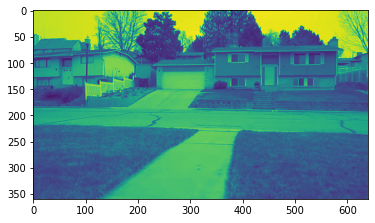

In [4]:
# To access and plot "img3"

image3=Image.open('img3.png')
image3_matrix=np.array(image3)
A3,B3=image3_matrix.shape
pyplot.imshow(image3)
pyplot.show()

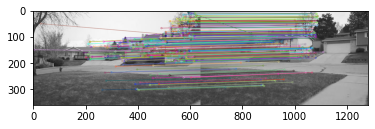

314

In [5]:
# To proceed SIFT ie to find corresponding coordinates between image 1 and image 2

img1 = cv2.imread('img1.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.png',cv2.IMREAD_GRAYSCALE) 

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])  
        
img4 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4)
plt.show()

count=0

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

correspondences = np.zeros((2, len(good_matches), 2))

for i, match in enumerate(good_matches):
    correspondences[0, i] = np.flip(kp1[match.queryIdx].pt)
    correspondences[1, i] = np.flip(kp2[match.trainIdx].pt)
    count=count+1
count         # Counting total number of pairs of corresponding coordinates

In [6]:
# Finding Homography between image 2 and image 1
# Finding the better Homography for which we get maximum concess points
# Running algorithm of RANSAC

conces=0
i = 0.75 * count                 # Taking 75% of Count
while conces<= math.floor(i):
    
    n1 = random.randint(0,count-1)
    x2,y2=correspondences[0,n1]
    x1,y1=correspondences[1,n1]
    
    n2 = random.randint(0,count-1)
    x4,y4=correspondences[0,n2]
    x3,y3=correspondences[1,n2]
    
    n3 = random.randint(0,count-1)
    x6,y6=correspondences[0,n3]
    x5,y5=correspondences[1,n3]
    
    n4 = random.randint(0,count-1)
    x8,y8=correspondences[0,n4]
    x7,y7=correspondences[1,n4]
    
    D=np.array([[-x1,-y1,-1,0,0,0,x1*x2,y1*x2,x2],
                [0,0,0,-x1,-y1,-1,x1*y2,y1*y2,y2],
                [-x3,-y3,-1,0,0,0,x3*x4,y3*x4,x4],
                [0,0,0,-x3,-y3,-1,x3*y4,y3*y4,y4],
                [-x5,-y5,-1,0,0,0,x5*x6,y5*x6,x6],
                [0,0,0,-x5,-y5,-1,x5*y6,y5*y6,y6],
                [-x7,-y7,-1,0,0,0,x7*x8,y7*x8,x8],
                [0,0,0,-x7,-y7,-1,x7*y8,y7*y8,y8]])    

    B = Matrix(D) 
    NullSpace = B.nullspace()  
    NullSpace = Matrix(NullSpace) 
    NullSpace
    Q=np.zeros((9,1))
    
    for i in range (9):
        Q[i]=NullSpace[i]
        H21= Q.astype('float64')
        H21=Q.reshape(3,3)
        H21
    
    for i in range (count):
        l,n=correspondences[1,i]
        K=np.array([l,n,1])
        K=K.reshape(3,1)
        Z = np.dot(H21,K)
        Q=Z[0]/Z[2]
        R=Z[1]/Z[2]
        po,pt=correspondences[0,i]
        t=((po-Q)**2)+((pt-R)**2)
        epsilon = math.sqrt(t)
        if (epsilon<5):
            conces=conces+1

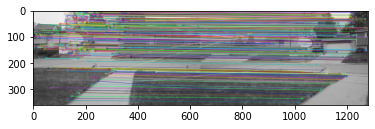

330

In [7]:
# To proceed SIFT ie to find corresponding coordinates between image 2 and image 3

img1 = cv2.imread('img3.png',cv2.IMREAD_GRAYSCALE)  
img2 = cv2.imread('img2.png',cv2.IMREAD_GRAYSCALE) 

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])  
        
img4 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4)
plt.show()

count_o=0

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

correspondences_o = np.zeros((2, len(good_matches), 2))

for i, match in enumerate(good_matches):
    correspondences_o[0, i] = np.flip(kp1[match.queryIdx].pt)
    correspondences_o[1, i] = np.flip(kp2[match.trainIdx].pt)
    count_o=count_o+1
count_o               # Counting total number of pairs of corresponding coordinates

In [8]:
# Finding Homography between image 2 and image 1
# Finding the better Homography for which we get maximum concess points
# Running algorithm of RANSAC

conces=0
j = 0.75 * count_o                # Taking 75% of Count
while conces<= math.floor(j):
    
    n1 = random.randint(0,count_o - 1)
    x2,y2=correspondences_o[0,n1]
    x1,y1=correspondences_o[1,n1]
    
    n2 = random.randint(0,count_o - 1)
    x4,y4=correspondences_o[0,n2]
    x3,y3=correspondences_o[1,n2]
    
    n3 = random.randint(0,count_o - 1)
    x6,y6=correspondences_o[0,n3]
    x5,y5=correspondences_o[1,n3]
    
    n4 = random.randint(0,count_o - 1)
    x8,y8=correspondences_o[0,n4]
    x7,y7=correspondences_o[1,n4]
    
    D=np.array([[-x1,-y1,-1,0,0,0,x1*x2,y1*x2,x2],
                [0,0,0,-x1,-y1,-1,x1*y2,y1*y2,y2],
                [-x3,-y3,-1,0,0,0,x3*x4,y3*x4,x4],
                [0,0,0,-x3,-y3,-1,x3*y4,y3*y4,y4],
                [-x5,-y5,-1,0,0,0,x5*x6,y5*x6,x6],
                [0,0,0,-x5,-y5,-1,x5*y6,y5*y6,y6],
                [-x7,-y7,-1,0,0,0,x7*x8,y7*x8,x8],
                [0,0,0,-x7,-y7,-1,x7*y8,y7*y8,y8]])    

    B = Matrix(D) 
    NullSpace = B.nullspace()  
    NullSpace = Matrix(NullSpace) 
    NullSpace
    Q=np.zeros((9,1))
    
    for i in range (9):
        Q[i]=NullSpace[i]
        H23= Q.astype('float64')
        H23=Q.reshape(3,3)
        H23
    
    for i in range (count_o):
        l,n=correspondences_o[1,i]
        K=np.array([l,n,1])
        K=K.reshape(3,1)
        Z = np.dot(H23,K)
        Q=Z[0]/Z[2]
        R=Z[1]/Z[2]
        po,pt=correspondences_o[0,i]
        t=((po-Q)**2)+((pt-R)**2)
        epsilon = math.sqrt(t)
        
        if (epsilon<5):
            conces=conces+1

In [9]:
# Creating the Mosaic i.e stiching multiple images and doing BILINEAR INTERPOLATION

em4 = np.zeros((3, 1))
OffsetRow = 70
OffsetColumn = 260

NumCanvasRows = 500
NumCanvasColumns = 1300

canvas = np.zeros((NumCanvasRows,NumCanvasColumns))

for jj in range (NumCanvasColumns):
    for ii in range (NumCanvasRows):
        
        i_ = ii - OffsetRow
        j_ = jj - OffsetColumn
        
        em4[0,0] = i_
        em4[1,0] = j_
        em4[2,0] = 1
        
        tmp = np.dot(H21,em4)
        i1 = tmp[0] / tmp[2]
        j1 = tmp[1] / tmp[2]
        
        i = math.floor(i1)
        j = math.floor(j1)
        a = i1-i
        b = j1-j
        if 0 <= i1 <(A1-1) and 0 <= j1 <(B1-1):
            intensity1 = (1-a)*(1-b)*image1_matrix[i,j]+(1-a)*(b)*image1_matrix[i,j+1]+(a)*(1-b)*image1_matrix[i+1,j]+(a)*(b)*image1_matrix[i+1,j+1]
        else:
            intensity1=0
        
        i = math.floor(i_)
        j = math.floor(j_)
        a = i_-i
        b = j_-j
        if 0 <= i_ <(A1-1)  and 0 <= j_ <(B1-1):
            intensity2 = (1-a)*(1-b)*image2_matrix[i,j]+(1-a)*(b)*image2_matrix[i,j+1]+(a)*(1-b)*image2_matrix[i+1,j]+(a)*(b)*image2_matrix[i+1,j+1]
        else:
            intensity2=0
            
        tmp_o = np.dot(H23,em4)
        i3 = tmp_o[0] / tmp_o[2]
        j3 = tmp_o[1] / tmp_o[2]    
            
        i = math.floor(i3)
        j = math.floor(j3)
        a = i3-i
        b = j3-j
        if 0 <= i3 <(A1-1)  and 0 <= j3 <(B1-1):
            intensity3 = (1-a)*(1-b)*image3_matrix[i,j]+(1-a)*(b)*image3_matrix[i,j+1]+(a)*(1-b)*image3_matrix[i+1,j]+(a)*(b)*image3_matrix[i+1,j+1]
        else:
            intensity3=0
            
            
        canvas[ii,jj] = (intensity1+intensity2+ intensity3)/3
             

In [10]:
# To view the mosach

new_image2 = Image.fromarray(canvas)
new_image2.show()